In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
data = pd.read_csv('./data/moore.csv', header=None).values # values will return a numpy array
X = data[:,0].reshape(-1,1) # X is a 2 D array of NXD
Y = data[:,1].reshape(-1,1) # Y is a 2 D array of NXK , K = number of outputs

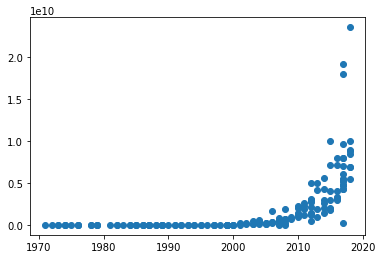

In [32]:
plt.scatter(X,Y);

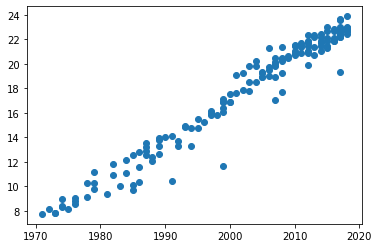

In [33]:
# take the log of Y
Y = np.log(Y)
plt.scatter(X,Y);

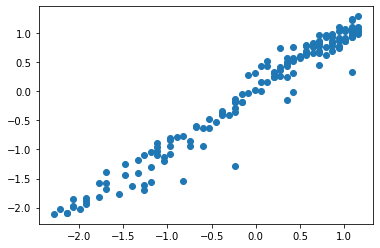

In [34]:
# Normalize or standarize 
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X - mx)/sx
Y = (Y - my)/sy
plt.scatter(X,Y); #both X and Y are now centered around 0 and the range is much smaller

In [35]:
# cast tp float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [36]:
# create a regression model
model = nn.Linear(1,1)

In [37]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [38]:
#convert numpy to torch tensors
inputs = torch.from_numpy(X) 
targets = torch.from_numpy(Y)

In [39]:
# Train model
n_epochs = 100
losses = []
for it in range(n_epochs):
    # zero gradients 
    optimizer.zero_grad()

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    # take the value from pytorch (tensor) to python list using the item () method
    # when the tensor is a single number that you want to extract
    losses.append(loss.item())

    #backward and optimize
    loss.backward()
    optimizer.step()

    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item(): 4f}')

Epoch 1/100, Loss:  1.628407
Epoch 2/100, Loss:  1.565446
Epoch 3/100, Loss:  1.462535
Epoch 4/100, Loss:  1.337656
Epoch 5/100, Loss:  1.203911
Epoch 6/100, Loss:  1.070281
Epoch 7/100, Loss:  0.942535
Epoch 8/100, Loss:  0.824063
Epoch 9/100, Loss:  0.716572
Epoch 10/100, Loss:  0.620629
Epoch 11/100, Loss:  0.536061
Epoch 12/100, Loss:  0.462243
Epoch 13/100, Loss:  0.398306
Epoch 14/100, Loss:  0.343269
Epoch 15/100, Loss:  0.296129
Epoch 16/100, Loss:  0.255915
Epoch 17/100, Loss:  0.221722
Epoch 18/100, Loss:  0.192729
Epoch 19/100, Loss:  0.168199
Epoch 20/100, Loss:  0.147482
Epoch 21/100, Loss:  0.130014
Epoch 22/100, Loss:  0.115302
Epoch 23/100, Loss:  0.102925
Epoch 24/100, Loss:  0.092521
Epoch 25/100, Loss:  0.083782
Epoch 26/100, Loss:  0.076446
Epoch 27/100, Loss:  0.070291
Epoch 28/100, Loss:  0.065129
Epoch 29/100, Loss:  0.060801
Epoch 30/100, Loss:  0.057173
Epoch 31/100, Loss:  0.054134
Epoch 32/100, Loss:  0.051587
Epoch 33/100, Loss:  0.049454
Epoch 34/100, Loss:

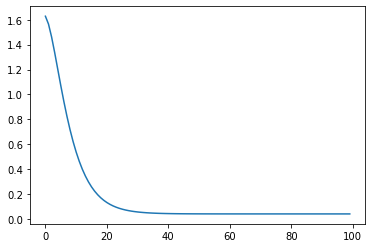

In [40]:
plt.plot(losses);

In [41]:
predicted = model(torch.from_numpy(X)).detach().numpy()

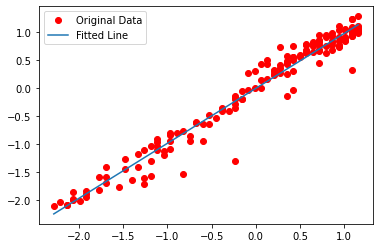

In [42]:
plt.plot(X,Y, 'ro', label = 'Original Data')
plt.plot(X,predicted, label = 'Fitted Line')
plt.legend();

In [29]:
W = model.weight.data.numpy()
B = model.bias.data.numpy()

In [30]:
print(W, B)

[[0.98027134]] [1.7431546e-05]
